In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

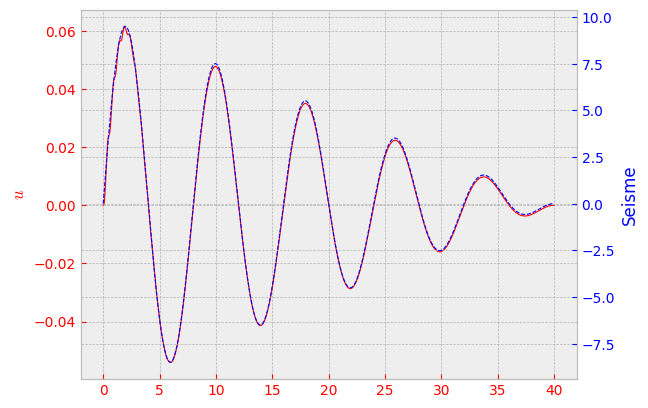

In [2]:
## Calcul de la reponse d'un systeme lineaire
## par la methode de la difference centrale
## (Chopra p.161)
## 
## Accelerogramme dans Seisme
## 
## interval de temps: dt
dt=1/100
## 
## nb de points: nb
nb=4000
t = np.arange(0,nb)*dt
Seisme = np.zeros(nb)
xmax = 10*np.pi
x = np.linspace(0,xmax,nb)
amplitude = 10
Seisme = np.sin(x)*(xmax - x) / xmax *amplitude
## 
## amortissement: z
z=5.0/100
## 
## frequence propre: f
f=2.0
## Stabilite

if 1/f/dt <= np.pi:
    raise ValueError(f'{Tn/dt = } <= pi')
## pulsation propre: w
w=2*np.pi*f
## 
## conditions initiales
u = np.zeros(nb)
v = np.zeros(nb)
## 
## 
## ****************************************************************
## Calcul initiaux kksurM, asurM, bsurM, uzero
## ****************************************************************
## 
## calculs preliminaires
a = np.zeros(nb)
a[0]=Seisme[0]-2*z*w*v[0]-w**2*u[0]
uzero=u[0]-dt*v[0]+dt**2/2*a[0]
kksurM=1/dt**2+z*w/dt
asurM=1/dt**2-z*w/dt
bsurM=w**2-2/dt**2
## 
## 
## ****************************************************************
## deplacements u, vitesses v, accelerations a
## ****************************************************************
## 
I=1
ppsurM=Seisme[I]-asurM*uzero-bsurM*u[I]
u[I+1]=ppsurM/kksurM
v[I]=u[I+1]-uzero/2/dt
a[I]=(u[I+1]-2*u[I]+uzero)/dt**2
for I in range(1,nb-1):
	ppsurM=Seisme[I]-asurM*u[I-1]-bsurM*u[I]
	u[I+1]=ppsurM/kksurM
	v[I]=(u[I+1]-u[I-1])/2/dt
	a[I]=(u[I+1]-2*u[I]+u[I-1])/dt**2

v[nb-1]=v[nb-2]
a[nb-1]=a[nb-2]
## 
## dessin de la reponse
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(t,u,'r', linewidth=0.8)
ax1.set_ylabel('$u$')
ax1.yaxis.label.set_color('r')
ax1.tick_params(colors='r', which='both')

ax2.plot(t, Seisme, '--b', linewidth=0.8)
ax2.set_ylabel('Seisme')
ax2.yaxis.label.set_color('b')
ax2.tick_params(colors='b', which='both')

plt.show()
